In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")

In [3]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0000,4.0000,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0000,7.0000,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0000,3.0000,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0000,6.0000,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0000,0.0000,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0000,4.0000,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0000,17.0000,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0000,1.0000,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0000,2.0000,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0000,4.0000,1.11,1.54


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [4]:
sales.columns

Index(['AccountId', 'AccountName', 'Region', 'Division', 'City', 'State',
       'Tier', 'Month', 'Sales2015', 'Sales2016', 'Units2015', 'Units2016',
       'TargetAchevied2015', 'TargetAchevied2016'],
      dtype='object')

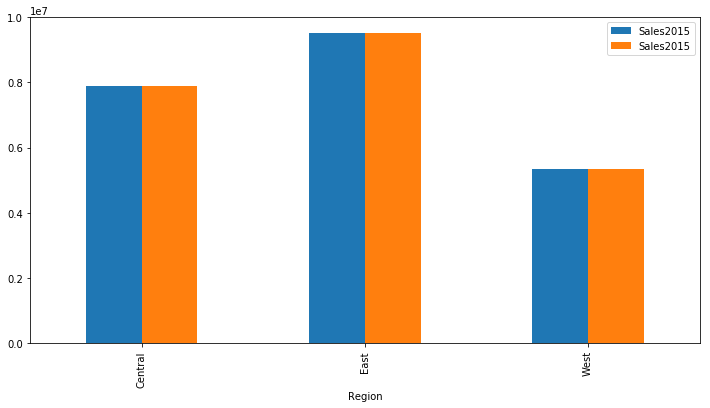

In [5]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1=sales.groupby('Region').aggregate('sum')
sales1.plot.bar(y=['Sales2015','Sales2015'],figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

            Sales2016  Units2016  TargetAchevied2016
Region                                              
Central  9.787809e+06  3690.3352             1711.85
East     1.266723e+07  4795.0016             1663.62
West     7.209689e+06  2671.0010             1232.42


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12138b550>,
      dtype=object)

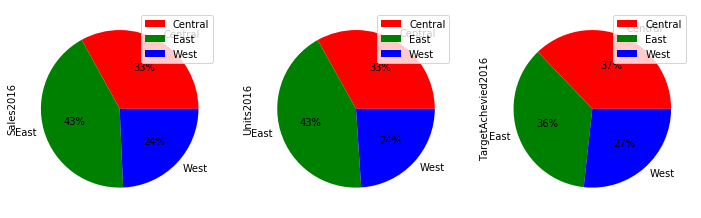

In [6]:
sales2 = sales[['Sales2016','Units2016','TargetAchevied2016']].groupby(sales['Region']).agg('sum')
# sales3=pd.DataFrame()
# sales3['Sales2016']=sales2['Sales2016']['sum']
# sales3['Units2016']=sales2['Units2016']['sum']
# sales3['TargetAchevied2016']=sales['TargetAchevied2016']['sum']
print(sales2)
sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',figsize=(12,6))

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [7]:
sales3 = sales.groupby(['Region','Tier']).aggregate('sum')
print(sales3)

#sales3graph=sales3.plot.bar(figsize=(18,6))

              AccountId     Sales2015     Sales2016  Units2015  Units2016  \
Region  Tier                                                                
Central High   73498425  4.798698e+06  6.026043e+06  1717.8353  2148.6678   
        Low    22377494  9.434397e+05  1.132833e+06   397.0000   484.5003   
        Med    28444816  2.068226e+06  2.632181e+06   868.1667  1058.1671   
        Out     2617238  8.136489e+04 -3.248530e+03    32.0000    -1.0000   
East    High   48680779  6.102946e+06  7.817151e+06  2297.3340  2951.1678   
        Low     6631590  9.016658e+05  1.144930e+06   377.0001   487.6665   
        Med    22220859  2.470998e+06  3.705150e+06   872.3349  1356.1673   
        Out     2392904  3.730655e+04  0.000000e+00    11.6667     0.0000   
West    High   43591846  2.944789e+06  3.768038e+06  1049.6675  1340.0010   
        Low    18480029  6.710644e+05  1.099502e+06   259.9999   438.8331   
        Med    16136405  1.718476e+06  2.342149e+06   618.6670   892.1669   

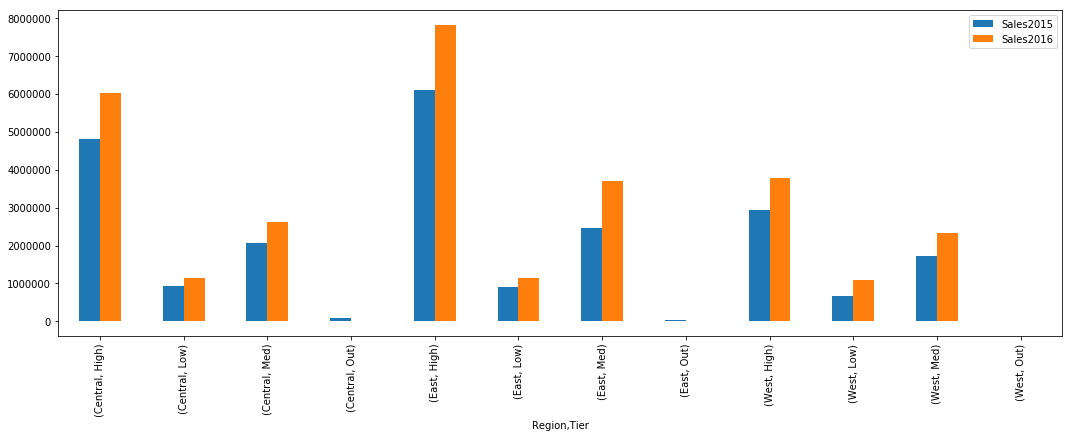

In [8]:
#sales1.plot.bar(y=['Sales2015','Sales2015'],figsize=(12,6))
sales3.plot.bar(y=['Sales2015','Sales2016'],figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [9]:
sales4=sales[(sales['Region']=='East')].groupby('State').aggregate('sum')
sales4['diffsales']=sales4['Sales2016']-sales4['Sales2015']
sales4

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,diffsales
State,,,,,,,,
CT,1045878,197202.790,323502.31,65.5003,101.6670,39.20,42.45,126299.520
DC,956281,216723.950,257421.69,73.0000,91.0000,26.62,33.02,40697.740
FL,21865892,1660162.000,2508232.28,632.9999,966.1676,279.43,326.81,848070.280
GA,6603273,681546.460,946919.77,263.0001,372.5000,107.22,126.92,265373.310
MA,999367,419278.750,687096.45,149.0000,257.5000,75.39,86.37,267817.700
MD,1720528,527309.060,750008.79,203.5012,289.0006,61.35,72.80,222699.730
ME,1412621,77425.640,183673.05,28.0000,68.0000,23.52,27.07,106247.410
NC,6788317,1292801.640,1610521.00,459.8334,582.4999,172.46,201.59,317719.360
NH,387992,136419.380,144717.51,47.0000,50.0000,25.42,27.82,8298.130


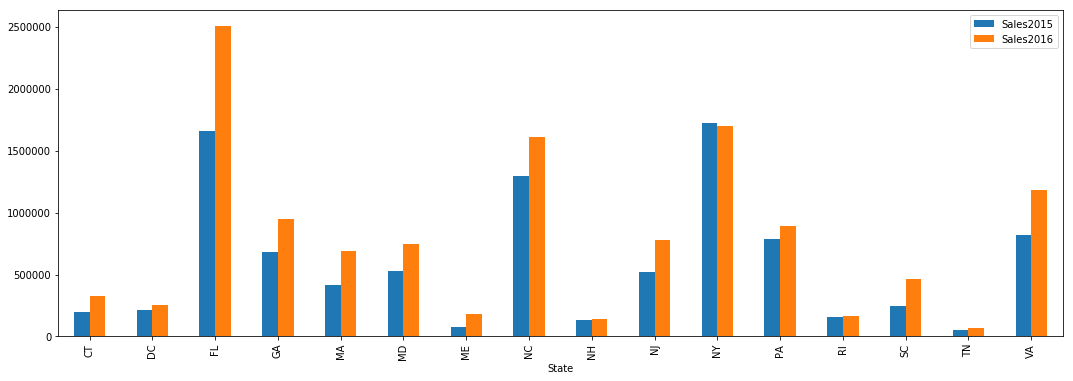

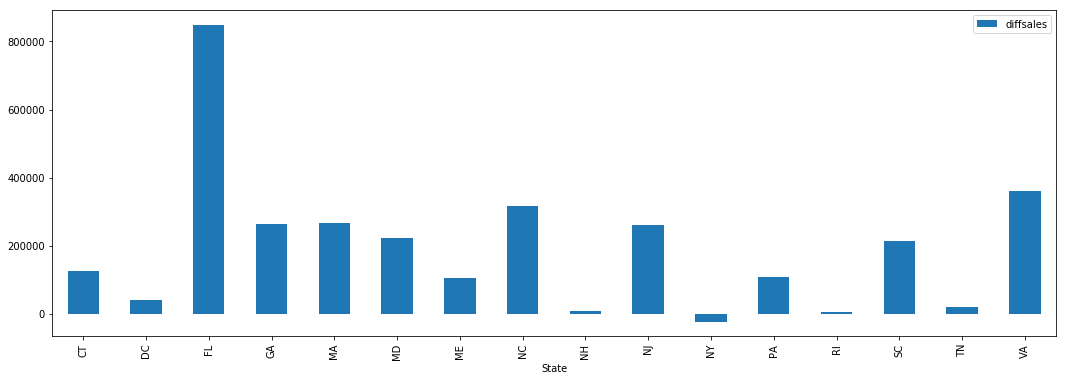

In [10]:
sales4.plot.bar(y=['Sales2015','Sales2016'],figsize=(18,6))
sales4.plot.bar(y=['diffsales'],figsize=(18,6))

#**Newyork state has had a decline compared to 2015**

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

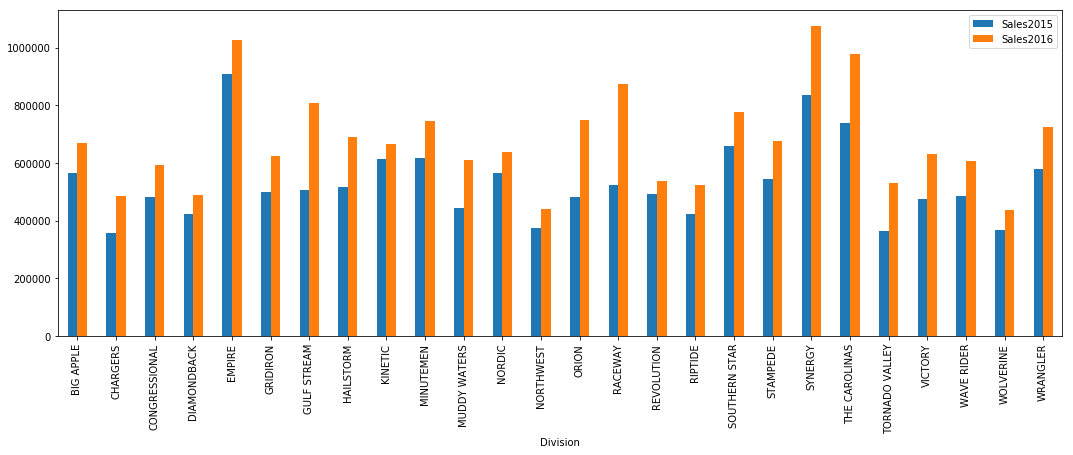

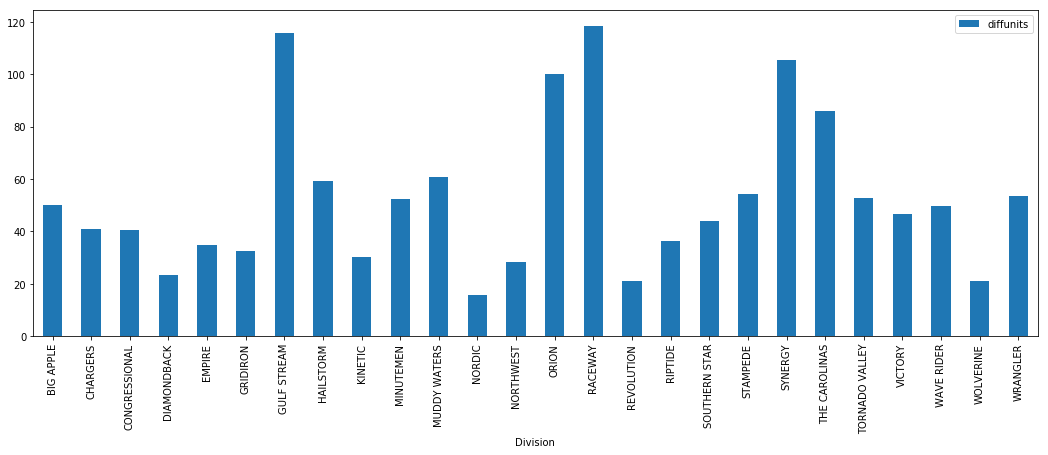

In [11]:
sales5=sales[sales['Tier']=='High'].groupby('Division').aggregate('sum')
sales5['diffunits']=sales5['Units2016']-sales5['Units2015']
sales5
sales5.plot.bar(y=['Sales2015','Sales2016'],figsize=(18,6))
sales5.plot.bar(y=['diffunits'],figsize=(18,6))


# No dividion saw decline

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [12]:
sales6=sales
sales6['Qtr']=sales6.isin

conditions = [
    (sales6['Month'].isin(['Jan','Feb','Mar'])),
    (sales6['Month'].isin(['Apr','May','Jun'])),
    (sales6['Month'].isin(['Jul','Aug','Sep'])),
    (sales6['Month'].isin(['Oct','Nov','Dec']))]
choices = ['Q1','Q2','Q3','Q4']
sales6['Qtr']= np.select(conditions, choices, np.nan)
sales6

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0000,4.0000,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0000,7.0000,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0000,3.0000,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0000,6.0000,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0000,0.0000,1.02,1.53,Q3
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0000,4.0000,1.03,1.45,Q3
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0000,17.0000,1.08,0.99,Q1
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0000,1.0000,0.79,1.46,Q1
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0000,2.0000,1.12,1.02,Q1
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0000,4.0000,1.11,1.54,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


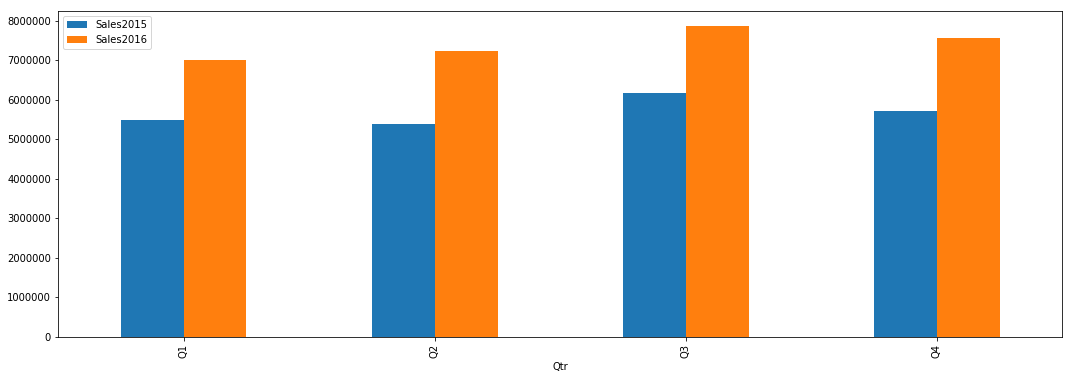

In [13]:
sales7=sales6[['Sales2015','Sales2016']].groupby(sales6['Qtr']).agg('sum')
sales7.plot.bar(y=['Sales2015','Sales2016'],figsize=(18,6))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [14]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Tier','Qtr']).aggregate('sum')['Sales2016']
sales8 = sales8.round(decimals=0)
# sales8 = sales8.stack() # long to wide data
# sales8 = sales8.unstack(level=0)
# sales8
sales8=sales8.unstack(level=1)
sales8

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867719.0,4130953.0,4872559.0,4740002.0
Low,948833.0,890595.0,795178.0,742659.0
Med,2181402.0,2215814.0,2197058.0,2085207.0


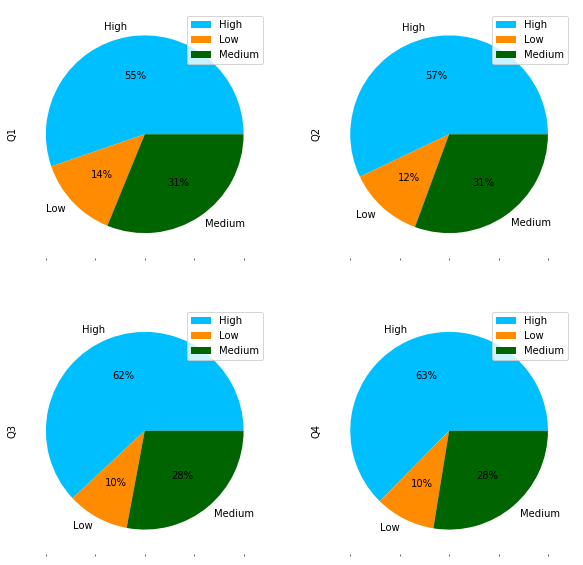

In [15]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()